<a href="https://colab.research.google.com/github/sabiretutardemir/Image-Classification/blob/main/CNN_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size: 26px; color: white; background-color: #334580; padding: 10px; border-radius: 5px; text-align: center;">
    Fish Classification with Convolutional Neural Network (CNN)
</h1>


<body>
    <div class="toc">
        <h2>Table of Contents</h2>
        <ul>            
            <h4>1. Problem Statement</h4>
            <h4>2. About Dataset</h4>
            <h4>3. Importing Libraries</h4>
            <h4>4. Basic EDA</h4>
            <h4>5. Splitting Dataset</h4>
            <h4>6. Best CNN Model
                <ul>
                    <h5>6.1. Data Augmentation with Mobilenet_v2</h5>
                    <h5>6.2. Building CNN Model</h5>
                </ul>
            </h4>
            <h4>7. Comparison of Experimental Results</h4>
            <h4>8. Model Assessment
                <ul>
                    <h5>8.1. Evaluation</h5>
                    <h5>8.2. Examples of Misclassification</h5>
                </ul>
            </h4>
            <h4>9. Final Discussion</h4>
            <h4>10. References</h4>
        </ul>
    </div>
</body>
</html>


<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
    1.Problem Statement
</h1>

<p style="font-size: 16px; color: black; text-align: left;">

The goal of this pipeline is to classify fish images by using pictures into 9 categories. This helps a fish packing company label and pack fish correctly,  meeting regulatory and customer requirements.

Accurate fish classification reduces errors in packaging and ensures compliance with industry standards. Automating this process enhance efficiency, reduce labor cost and streamline operations.

This is a supervised image classification problem. The model will be trained and learn feautures like size, color, shape from labeled images in order to accurately predict fish species. The model's performance will be evaluated using metrics such as accuracy, precision to ensure reliable results.


</p>

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   2.About Dataset
</h1>

<p style="font-size: 16px; color: black; text-align: left;">

To build the fish classification model, a dataset containing labeled images of different fish species is essential. For this task, the Large Scale Fish Dataset from Kaggle is a reliable source. It contains 9,000 images across 9 species, with 1,000 images per species, ensuring balanced representation. The dataset can be accessed at this link: https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset/data

</p>

<p style="font-size: 16px; color: black; text-align: left;">

There are 9 different folders, each corresponding to a fish category. Each folder contains 1,000 augmented images belonging to that category. Additionally, each category has 1,000 images for their pairwise augmented ground truths (GT). I removed the GT folders from the dataset since they will not be used for classification in this pipeline.

</p>

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   3.Importing Libraries
</h1>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import itertools
import os
import shutil
import random
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   4.Basic EDA
</h1>

In [ ]:
#Folder path
original_dataset_dir = './Fish_Dataset/Main_Fish_DataSet'

In [ ]:
classes = [i for i in os.listdir(original_dataset_dir) if '.' not in i]
print('Name of the classes; ')
classes

Name of the classes; 


['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [ ]:
print('The folder names and number of images they contain:\n')
for folder_name in os.listdir(original_dataset_dir):
    folder_path = os.path.join(original_dataset_dir, folder_name)


    if os.path.isdir(folder_path):
        #List all files in the folder
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


        print(f"Folder: {folder_name}, Number of images: {len(images)}")


The folder names and number of images they contain:

Folder: Black Sea Sprat, Number of images: 1000
Folder: Gilt-Head Bream, Number of images: 1000
Folder: Hourse Mackerel, Number of images: 1000
Folder: Red Mullet, Number of images: 1000
Folder: Red Sea Bream, Number of images: 1000
Folder: Sea Bass, Number of images: 1000
Folder: Shrimp, Number of images: 1000
Folder: Striped Red Mullet, Number of images: 1000
Folder: Trout, Number of images: 1000


<p style="font-size: 16px; color: black; text-align: left;">
This result indicates that there is no imbalance issue in the dataset.
</p>

<p style="font-size: 16px; color: black; text-align: left;">
Example pictures from each fish category;
</p>



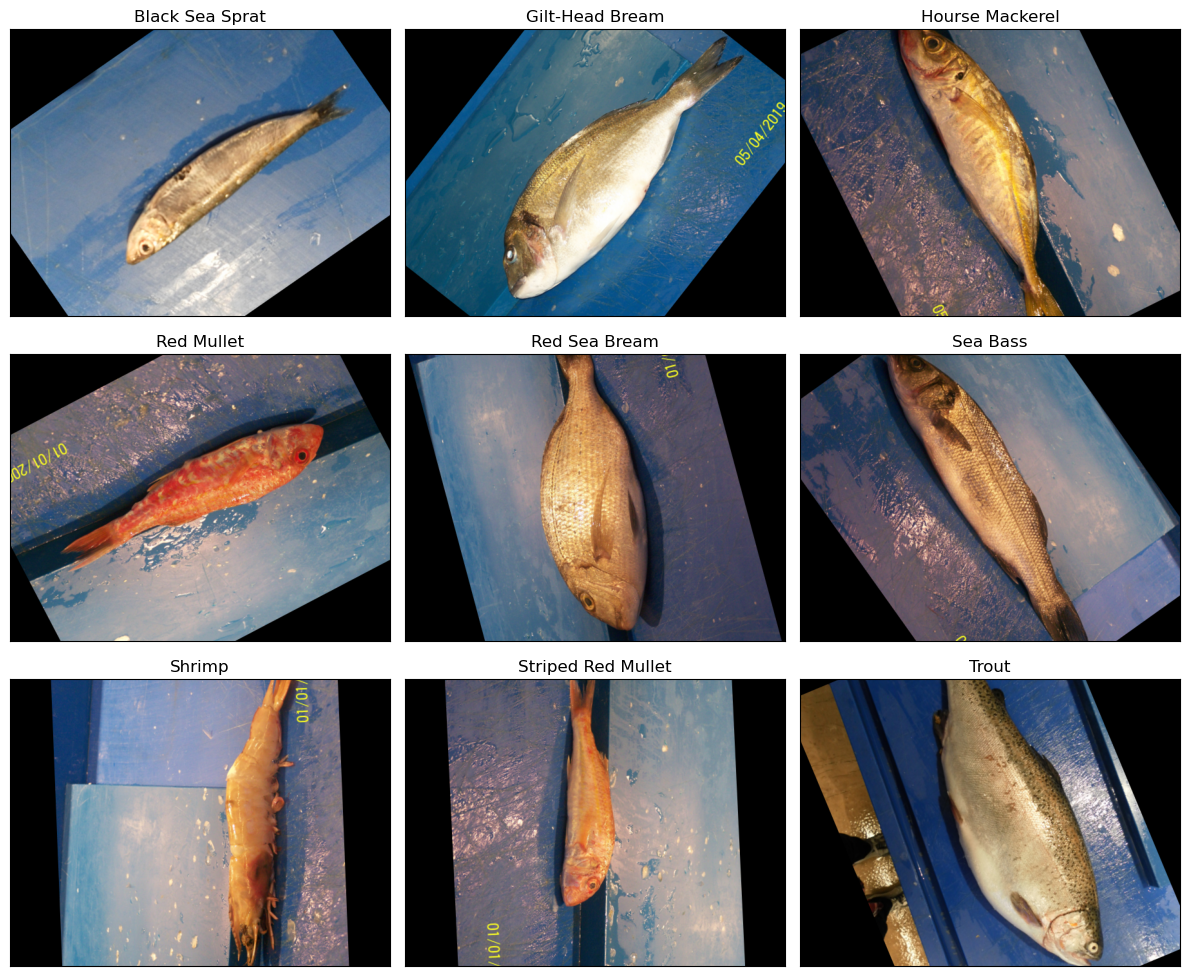

In [ ]:
from PIL import Image

#Grades for 3 columns x 3 rows
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), subplot_kw={'xticks': [], 'yticks': []})

#Loop through the folders and display one image from each folder
for i, folder_name in enumerate(folder_names[:9]):  #There are 9 folders
    folder_path = os.path.join(original_dataset_dir, folder_name)
    #Get image files in each folder (assuming images are in the folder)
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    #Select the first image from each folder
    img_name = images[0]
    img_path = os.path.join(folder_path, img_name)

    #Open and display the image
    img = Image.open(img_path)

    #Set the current axis and show the image
    ax = axes.flat[i]
    ax.imshow(img)
    ax.set_title(folder_name)

plt.tight_layout()
plt.show()


<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   5.Splitting Dataset
</h1>

<p style="font-size: 16px; color: black; text-align: left;">
    
The dataset is splited into three categories: train, validation, and test, following a 70-15-15 split ratio. A new folder named 'Dataset' was created to store the train, test, and validation images. Each of these folders contains nine subfolders, each representing a fish category. The images were shuffled and copied into their respective subfolders within the 'Dataset' directory.

</p>

In [ ]:
#Define paths
base_dir = "./Fish_Dataset/Main_Fish_DataSet/Dataset" #the path of the new folder
train_dir = os.path.join(base_dir, "Train")
val_dir = os.path.join(base_dir, "Validation")
test_dir = os.path.join(base_dir, "Test")

#directories for splits
for split_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Process each class folder
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_path):
        #get all image filenames
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(".png")]

        #shuffle the images
        random.shuffle(images)

        # Ensure there are enough images for splitting
        if len(images) < 10:
            print(f"Warning: Not enough images in class {class_name} to split properly!")
            continue

        #split into train, test, validation
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

        #create subfolders for each class
        for split_dir, split_images in zip([train_dir, val_dir, test_dir], [train_images, val_images, test_images]):
            class_split_dir = os.path.join(split_dir, class_name)
            os.makedirs(class_split_dir, exist_ok=True)

            #copy images to respective folders
            for img_path in split_images:
                shutil.copy(img_path, class_split_dir)

print("Dataset successfully split into Train, Validation, and Test!")

Dataset successfully split into Train, Validation, and Test!


<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   6.Best CNN Model
</h1>

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   6.1. Data Augmentation with Mobilenet_v2
</h2>

In [ ]:
train_path = "./Fish_Dataset/Main_Fish_DataSet/Dataset/Train"
val_path = "./Fish_Dataset/Main_Fish_DataSet/Dataset/Validation"
test_path = "./Fish_Dataset/Main_Fish_DataSet/Dataset/Test"

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

train_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)


valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical'
    )


test_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(
        directory=test_path,
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=32,
        shuffle=False,
        class_mode='categorical'
    )

Found 6300 images belonging to 9 classes.
Found 1350 images belonging to 9 classes.
Found 1350 images belonging to 9 classes.


<p style="font-size: 16px; color: black; text-align: left;">
    
I utilized ImageDataGenerator class to create batches of data from the training, validation, and test folders.

The ImageDataGenerator.flow_from_directory() method creates a DirectoryIterator, which produces batches of normalized tensor image data from the specified directories.

To enhance the model's performance and address overfitting issues, I augmented the training dataset with MobileNetV2.

Additionally, I set shuffle=False exclusively for the test batches. This ensures that I can access the unshuffled test labels later when plotting the evaluation results as a confusion matrix.

</p>

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   6.2. Building CNN Model
</h2>

In [ ]:
model_DeepCNN2_v2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(224, 224, 3)),

    #First Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    #Second Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    #Third Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    #Fourth Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),

    #Dense layer + LeakyReLU
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),

    #Second dense layer with LeakyReLU
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),

    tf.keras.layers.Dropout(0.2),

    #Third dense layer with LeakyReLU
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(9, activation='softmax')
])

model_DeepCNN2_v2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,509,577 (9.57 MB)

 Trainable params: 2,509,577 (9.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Add the ReduceLROnPlateau callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6          #minimum learning rate
)


model_DeepCNN2_v2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_model_DeepCNN2_v2_LR = model_DeepCNN2_v2.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=20,
    verbose=2,
    callbacks=[lr_scheduler]
)


Epoch 1/20
197/197 - 206s - 1s/step - accuracy: 0.3770 - loss: 1.6380 - val_accuracy: 0.6430 - val_loss: 0.9436 - learning_rate: 0.0010
Epoch 2/20
197/197 - 205s - 1s/step - accuracy: 0.6559 - loss: 0.8997 - val_accuracy: 0.7296 - val_loss: 0.7113 - learning_rate: 0.0010
Epoch 3/20
197/197 - 197s - 998ms/step - accuracy: 0.7879 - loss: 0.5800 - val_accuracy: 0.8844 - val_loss: 0.3044 - learning_rate: 0.0010
Epoch 4/20
197/197 - 201s - 1s/step - accuracy: 0.8487 - loss: 0.4168 - val_accuracy: 0.8985 - val_loss: 0.2284 - learning_rate: 0.0010
Epoch 5/20
197/197 - 192s - 977ms/step - accuracy: 0.8921 - loss: 0.2913 - val_accuracy: 0.9319 - val_loss: 0.1813 - learning_rate: 0.0010
Epoch 6/20
197/197 - 189s - 960ms/step - accuracy: 0.9037 - loss: 0.2693 - val_accuracy: 0.9570 - val_loss: 0.1109 - learning_rate: 0.0010
Epoch 7/20
197/197 - 189s - 961ms/step - accuracy: 0.9230 - loss: 0.2248 - val_accuracy: 0.9719 - val_loss: 0.0802 - learning_rate: 0.0010
Epoch 8/20
197/197 - 191s - 971ms/st

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   7.Comparison of Experimental Results
</h1>

![image.png](attachment:47d16260-7181-4d13-b545-e13eedbaf545.png)

![image.png](attachment:9a607b9f-99fe-4e19-b67c-281d23c036b9.png)

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   8.Model Assesment
</h1>
       

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   8.1. Evaluation
</h2>

In [ ]:
loss, accuracy = model_DeepCNN2_v2.evaluate(test_batches, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.9742 - loss: 0.0744
Test Loss: 0.0445
Test Accuracy: 0.9852


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = model_DeepCNN2_v2.predict(test_batches, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

report = classification_report(
    y_true,
    y_pred,
    target_names=list(test_batches.class_indices.keys())
)
print(report)


43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 272ms/step
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       150
   Gilt-Head Bream       1.00      0.87      0.93       150
   Hourse Mackerel       1.00      1.00      1.00       150
        Red Mullet       1.00      1.00      1.00       150
     Red Sea Bream       0.88      1.00      0.94       150
          Sea Bass       1.00      1.00      1.00       150
            Shrimp       1.00      1.00      1.00       150
Striped Red Mullet       1.00      1.00      1.00       150
             Trout       1.00      1.00      1.00       150

          accuracy                           0.99      1350
         macro avg       0.99      0.99      0.99      1350
      weighted avg       0.99      0.99      0.99      1350



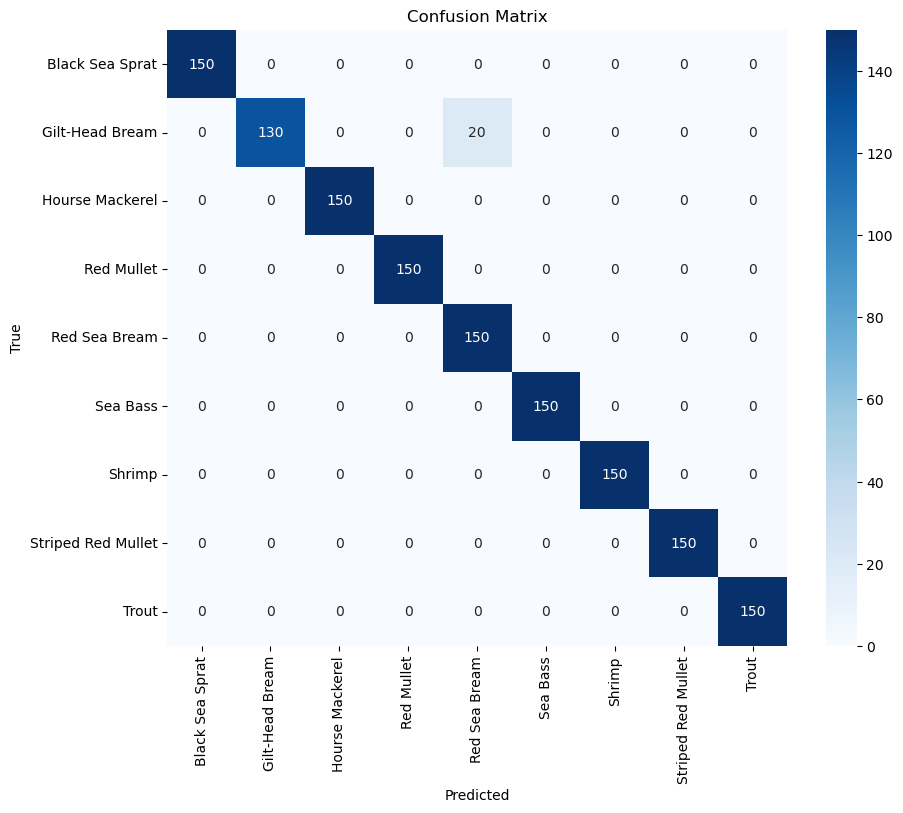

In [ ]:
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_batches.class_indices.keys()),
            yticklabels=list(test_batches.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<p style="font-size: 16px; color: black; text-align: left;">
    
99% Accuracy on the test set is an excellent result.

Both macro and weighted averages for precision, recall, and F1-score are 0.99, confirming consistent performance across all categories.
Based on the confusion matrix there are minor issues in distinguishing Gilt-Head Bream and Red Sea Bream.

Gilt-Head Bream: 130 were correctly classified, and 20 were misclassified as "Red Sea Bream". Other categories have all 150 samples correctly classified.

The model may shows better differentiate performance if it has more samples for Gilt-Head Bream and Red Sea Bream.

</p>

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   8.2. Examples of Misclassification
</h2>

In [ ]:
test_image_paths = test_batches.filepaths


results_df = pd.DataFrame({
    'FilePath': test_image_paths,
    'TrueLabel': [list(test_batches.class_indices.keys())[i] for i in y_true],
    'PredictedLabel': [list(test_batches.class_indices.keys())[i] for i in y_pred]
})


results_df['Correct'] = results_df['TrueLabel'] == results_df['PredictedLabel']


correct_preds = results_df[results_df['Correct'] == True]
incorrect_preds = results_df[results_df['Correct'] == False]

print("Correct Predictions:")
print(correct_preds.head())
print("\nIncorrect Predictions:")
print(incorrect_preds.head())


Correct Predictions:
                                            FilePath        TrueLabel  \
0  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
1  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
2  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
3  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
4  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   

    PredictedLabel  Correct  
0  Black Sea Sprat     True  
1  Black Sea Sprat     True  
2  Black Sea Sprat     True  
3  Black Sea Sprat     True  
4  Black Sea Sprat     True  

Incorrect Predictions:
                                              FilePath        TrueLabel  \
156  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Gilt-Head Bream   
157  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Gilt-Head Bream   
169  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Gilt-Head Bream   
199  ./Fish_Dataset/Main_Fish_DataSe

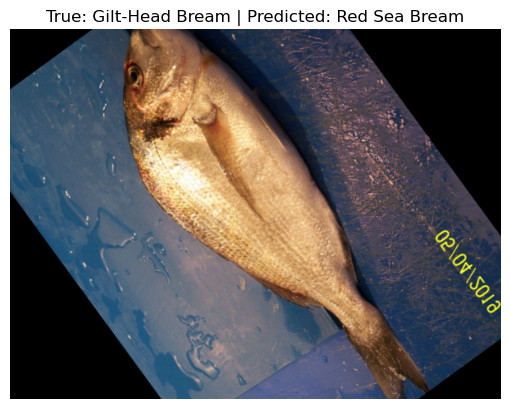

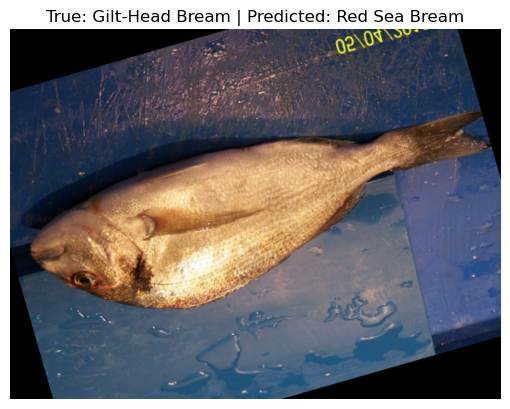

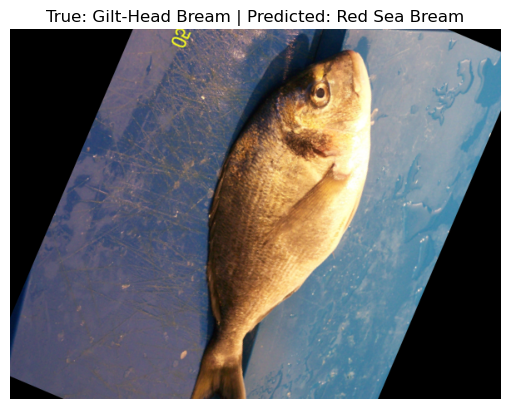

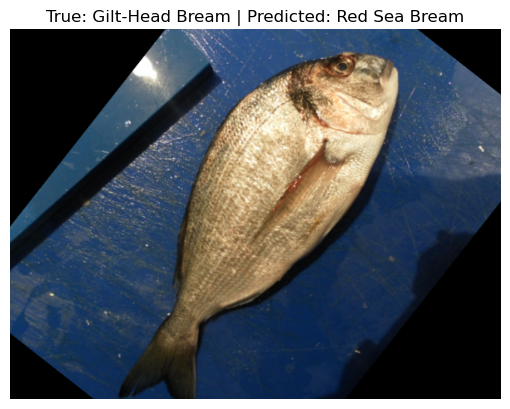

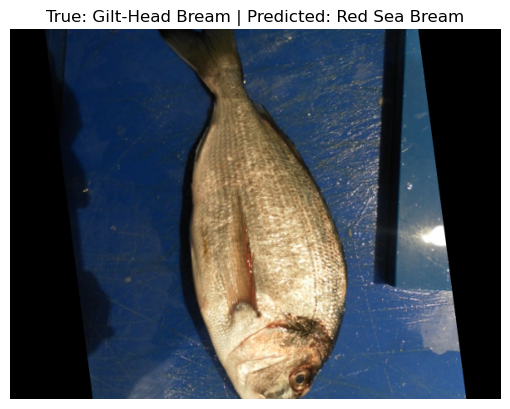

In [ ]:
from PIL import Image

for idx, row in incorrect_preds.head(5).iterrows():  # Show first 5 incorrect images
    img = Image.open(row['FilePath'])
    plt.imshow(img)
    plt.title(f"True: {row['TrueLabel']} | Predicted: {row['PredictedLabel']}")
    plt.axis('off')
    plt.show()


<p style="font-size: 16px; color: black; text-align: left;">
    
I listed 5 example images of Gilt-Head Bream that is classified as Red Sea Bream.

</p>

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   9.Final Discussion
</h1>
    

<p style="font-size: 16px; color: black; text-align: left;">
    
This pipeline achieved strong performance with an accuracy of 0.9852.

Throughout the experiments, I used 20 epochs with early stopping to prevent overfitting.

I started a model, consisting of 3 basic layer and it struggled to generalize and showed signs of overfitting. To get rid of overfitting, I applied data augmentation techniques, modified the activation function, and adjusting dropout and additional Conv2D layers. **Using MobileNetV2** for data augmentation significantly improved performance compared to VGG16, offering both better accuracy and faster training times.


**Adding two dropout layers with a 0.2 rate** enhanced the model's stability and performance. 3-layer architecture was too simple, and a 5-layer model increased validation loss, a 4-layer structure worked better. I fine tuned the dropout placement and adjusted the dropout rates to achieve optimal results.

**Changing Activation Function** from ReLU to LeakyReLU improved model's validation accuracy and loss, particularly for this dataset, which included 9 classes and 9,000 images.


**Adjusting Learning Rate** in the final stages boosted model performance, making it reliable for the classification task.

While the model performed well overall, it has room for improvement in distinguishing between Gilt-Head Bream and Red Sea Bream because of their visual similarity. Increasing the number of samples for these two categories might enhance accuracy for future iterations. For other categories, the model showed excellent classification capability.

</p>

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   10. References
</h1>
    

O.Ulucan, D.Karakaya, and M.Turkan.(2020) A large-scale dataset for fish segmentation and classification.
In Conf. Innovations Intell. Syst. Appli. (ASYU)